# Main task: cLeAn CodE & nEw daTa STruCturE
focus: object vertex

## NetVlad

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import vlad_emb
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models

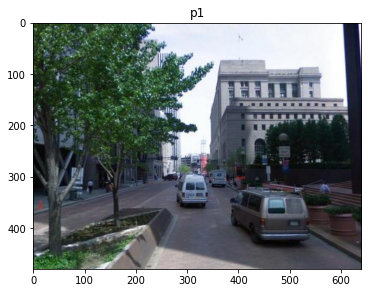

In [9]:
p1 = Image.open('./sample_pitt250k_3/q1.jpg')
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title('p1')
plt.imshow(p1)

In [10]:
print(vlad_emb.get_vlad_emb(p1))
vlad_p1 = vlad_emb.get_vlad_emb(p1)
torch.flatten(vlad_p1)

tensor([[ 7.1684e-04,  6.6961e-03,  4.6200e-04,  ...,  1.1777e-02,
          5.3187e-03, -8.2065e-05]])


tensor([ 7.1684e-04,  6.6961e-03,  4.6200e-04,  ...,  1.1777e-02,
         5.3187e-03, -8.2065e-05])

## Remove 'odd' rooms

In [3]:
import util
util.remove_odd_rooms(rooms='rooms.txt', excluded='excluded.txt', rooms_cleaned='rooms_cleaned.txt')

number of rooms originally: 477
number of rooms after exclustion: 432
0 []
Checked :)


Note: the room below is causing hard-to-fix bug, so I chooed to delete it mamually\
main reference:\
634d11cd-6833-255d-8c5c-2b0cf661494a\
rescans:\
634d11cf-6833-255d-8fbc-ed09c93a8d35\
634d11d1-6833-255d-8d07-73e59b2db4a9

In [17]:
!head -3 rooms_cleaned.txt

02b33dfb-be2b-2d54-92d2-cd012b2b3c40 fcf66d9e-622d-291c-84c2-bb23dfe31327 02b33df9-be2b-2d54-9062-1253be3ce186 02b33dfd-be2b-2d54-91d2-55454852009e 
02b33e01-be2b-2d54-93fb-4145a709cec5 fcf66d8a-622d-291c-8429-0e1109c6bb26 fcf66d88-622d-291c-871f-699b2d063630 02b33e03-be2b-2d54-9129-5d28efdd68fa 
095821f7-e2c2-2de1-9568-b9ce59920e29 2e369567-e133-204c-909a-c5da44bb58df 095821f9-e2c2-2de1-9707-8f735cd1c148 095821fb-e2c2-2de1-94df-20f2cb423bcb 


## Generate labels

In [2]:
import util
util.generate_labels('rooms_cleaned.txt')

{'02b33dfb-be2b-2d54-92d2-cd012b2b3c40': 0,
 'fcf66d9e-622d-291c-84c2-bb23dfe31327': 0,
 '02b33df9-be2b-2d54-9062-1253be3ce186': 0,
 '02b33dfd-be2b-2d54-91d2-55454852009e': 0,
 '02b33e01-be2b-2d54-93fb-4145a709cec5': 1,
 'fcf66d8a-622d-291c-8429-0e1109c6bb26': 1,
 'fcf66d88-622d-291c-871f-699b2d063630': 1,
 '02b33e03-be2b-2d54-9129-5d28efdd68fa': 1,
 '095821f7-e2c2-2de1-9568-b9ce59920e29': 2,
 '2e369567-e133-204c-909a-c5da44bb58df': 2,
 '095821f9-e2c2-2de1-9707-8f735cd1c148': 2,
 '095821fb-e2c2-2de1-94df-20f2cb423bcb': 2,
 '0958220d-e2c2-2de1-9710-c37018da1883': 3,
 '0958220b-e2c2-2de1-96bc-739f09c1e8f8': 3,
 '09582205-e2c2-2de1-9475-1cdac7639e60': 3,
 '09582207-e2c2-2de1-972c-225d968c2ab4': 3,
 '09582209-e2c2-2de1-9610-08baed932919': 3,
 '09582212-e2c2-2de1-9700-fa44b14fbded': 4,
 '0958221b-e2c2-2de1-96b1-6233099811a0': 4,
 '09582214-e2c2-2de1-956a-64d8da4ba7cc': 4,
 '09582216-e2c2-2de1-97de-efcab1ef9c43': 4,
 '09582219-e2c2-2de1-9534-519142703037': 4,
 '09582225-e2c2-2de1-9564-f6681e

## Fetch object info from .json

In [3]:
import json
import torch
import util
import grakit

# get obj info
path = './sample_3rscan_10/0a4b8ef6-a83a-21f2-8672-dce34dd0d7ca/semseg.v2.json'
obj_info = util.get_object_info_json(path)
print(len(obj_info))
print(obj_info[0])

# then get obj vertex
obj_v = grakit.load_object_vertex(obj_info, 0, 1)
print(len(obj_v))
print(obj_v[0])

30
(tensor([ 0.3587,  0.3052, -1.1691]), tensor([ 0.0000e+00, -2.2204e-16,  1.0000e+00]))
30
vertex | tag: 0
            pos: tensor([ 0.3587,  0.3052, -1.1691])
                feat: tensor([ 0.0000e+00, -2.2204e-16,  1.0000e+00])


## Construct graph

In [7]:
import torch
import util
import grakit
import numpy as np
from scipy.spatial import distance

# get obj info
path = './sample_3rscan_10/0a4b8ef6-a83a-21f2-8672-dce34dd0d7ca/semseg.v2.json'
obj_info = util.get_object_info_json(path)

# then get obj vertex
obj_v = grakit.load_object_vertex(raw_vs=obj_info, pos_ind=0, feat_ind=1)
obj_g = grakit.graph(vertices=obj_v, base=0, method=0, ratio=0.9)
obj_g.get_nbs()[0][0], obj_g.get_nbs()[1][0]

(18,
 array([ 1,  3,  4,  5,  6,  7,  9, 11, 12, 14, 19, 20, 23, 24, 25, 26, 27,
        28]))

In [12]:
a = ['a','a','b','c', 'd']
b = ['a','b']
[x for x in a if x not in b]

['c', 'd']

## 1) Build data.txt

In [1]:
import util
util.build_data(rooms_path='sample_rooms_10.txt', target_name='DEMO10', 
                pos_ind=0, feat_ind=1, base=0, method=0, ratio=0.5)
!head -5 ./pytorch_DGCNN-master/data/DEMO10/DEMO10.txt

44
28 0
0 0  0.0 -2.220446e-16 1.0
0 0  0.48151407 -0.8764384 -1.9460841e-16
0 2 15 23 0.8736269 0.48659638 1.080461e-16


## 2) Build up cross validation

In [2]:
import util
util.build_cv_split_10fold('DEMO10', 44, 4)
!cat ./pytorch_DGCNN-master/data/DEMO10/10fold_idx/test_idx-1.txt

21
18
9
22


## 3) Run DGCNN

In [3]:
%cd pytorch_DGCNN-master
!pwd

/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master


In [13]:
!./run_DGCNN.sh DEMO10 9 4

====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=1, conv1d_activation='ReLU', data='DEMO10', dropout=True, edge_feat_dim=0, extract_features=False, feat_dim=0, fold=9, gm='DGCNN', hidden=128, latent_dim=[32, 32, 32, 1], learning_rate=1e-05, max_lv=4, mode='gpu', num_class=0, num_epochs=50, out_dim=0, printAUC=False, seed=1, sortpooling_k=0.6, test_number=4)
loading data
# classes: 10
# maximum node tag: 1
# train: 40, # test: 4
k used in SortPooling is: 21
Initializing DGCNN
loss: 2.41449 acc: 0.00000: 100%|████████████| 40/40 [00:00<00:00, 48.45batch/s]
average training of epoch 0: loss 2.28286 acc 0.17500 auc 0.00000
loss: 2.32909 acc: 0.00000: 100%|█████████████| 4/4 [00:00<00:00, 466.34batch/s]
average test of epoch 0: loss 2.34582 acc 0.00000 auc 0.00000
loss: 2.22083 acc: 0.00000: 100%|███████████| 40/40 [00:00<00:00, 212.60batch/s]
average training of epoch 1: loss 2.29578 acc 0.07500 auc 0.00000
loss: 2.332

loss: 2.25126 acc: 1.00000: 100%|███████████| 40/40 [00:00<00:00, 208.95batch/s]
average training of epoch 25: loss 2.26123 acc 0.10000 auc 0.00000
loss: 2.42627 acc: 0.00000: 100%|█████████████| 4/4 [00:00<00:00, 465.71batch/s]
average test of epoch 25: loss 2.41491 acc 0.00000 auc 0.00000
loss: 2.19807 acc: 0.00000: 100%|███████████| 40/40 [00:00<00:00, 213.50batch/s]
average training of epoch 26: loss 2.29114 acc 0.10000 auc 0.00000
loss: 2.42956 acc: 0.00000: 100%|█████████████| 4/4 [00:00<00:00, 474.64batch/s]
average test of epoch 26: loss 2.41760 acc 0.00000 auc 0.00000
loss: 2.33861 acc: 0.00000: 100%|███████████| 40/40 [00:00<00:00, 202.87batch/s]
average training of epoch 27: loss 2.26880 acc 0.07500 auc 0.00000
loss: 2.43231 acc: 0.00000: 100%|█████████████| 4/4 [00:00<00:00, 444.58batch/s]
average test of epoch 27: loss 2.41923 acc 0.00000 auc 0.00000
loss: 2.24067 acc: 0.00000: 100%|███████████| 40/40 [00:00<00:00, 194.41batch/s]
average training of epoch 28: loss 2.23501 